# Coursework One - Q1 - House Price Prediction - Student

## Instructions

This is a dataset containing house prices and associated features. 

1. Load the file housing/train.csv. This is the only data you will use.
2. Visualise and analyse the data. 
3. Your aim is to predict the SalesPrice column so study its distribution.
4. Examine which features are most correlated with the sales price.
5. Look for missing data and other issues.
6. Visualise the data and look for outliers to remove.
7. Drop any columns that do not seem helpful for predicting.
8. Split the data into a 33% test and 66% training set.
9. Use a linear regression model and compare its training and test performance.
10. Use Scipy or Statamodels to get the p-values and to see which features are important.
11. Repeat the fitting but use a Lasso and Ridge Regression. Discuss your results.


# <font color = 'midnightblue'> **Housing Price Prediction**

## Table of Contents <a name="toc"></a>

1. [**Data Preparation**](#1)
    - [Deal with missing values](#1.1)
    - [Numerical Values Conversion](#1.2)
2. [**Data Analysis and Visualization**](#2)
    - [Visualize the dataset and correlation matrix](#2.1)
    - [Standardization](#2.2)
    - [Remove Outliers](#2.3)
3. [**Train and Test Split**](#3)
    - [Linear Regression-Normal Equation](#3.1)
    - [Stochastic Gradient Descent](#3.2)
    - [Gradient Boosting Regression](#3.3)
4. [**Ridge and LASSO Regression**](#4)
    - [Ridge Regression](#4.1)
    - [LASSO Regression](#4.2)
5. [**Conclusion**](#5)


In [1]:
# Setup
import numpy as np     
import pandas as pd     
import matplotlib.pyplot as plt     
%matplotlib inline
import matplotlib as mpl    
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

## 1. **Data Preparation** <a name="1"></a>
[Back to TOP](#toc)

<font size=3>In this section, we will first load the housing data that we need for our prediction and then look for and deal with the missing values of some features. We also convert the text values of categorical datasets to numerical values, which make our work afterwards more convenient

In [2]:
#Load the data file
df = pd.read_csv("train.csv") # Please change the data directory
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#take a look at the shape of the datasets, there are 80 features and 1 target Saleprice
df.shape

(1460, 81)

<font color = "midnightblue"><font size = 4> **1.1 Deal with the missing values** <a name = "1.1"></a>
    
[Back to TOP](#toc)

In [4]:
## Let's see which columns have the most NAs
null_col = df.columns[df.isnull().any()]
print(df[null_col].isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


<font size=3> We can see there are a lot of undesirbable NAs for columns 'Alley','PoolQC','FireplaceQu','Fence','MiscFeature', these features are unlikely helpful therefore we drop these columns. We also drop the col 'Id' as it doesn't has too much information

In [5]:
df.drop(['Alley','Fence','PoolQC','MiscFeature','FireplaceQu','Id'],axis=1,inplace=True)
df.shape

(1460, 75)

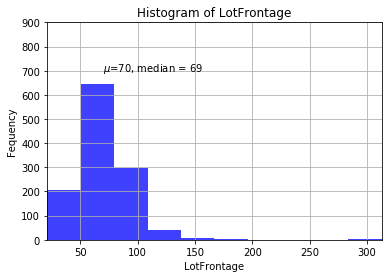

In [6]:
# For LotFrontage feature, I don't want lose too many data so let's have a look at its distribution first before we fill the NAs
plt.hist(df['LotFrontage'], bins = 10, facecolor='b', alpha=0.75) 
plt.xlabel('LotFrontage')
plt.ylabel('Fequency')
plt.title('Histogram of LotFrontage')
plt.text(70, 700, r'$\mu$=70, median = 69')
plt.xlim(df['LotFrontage'].min(), df['LotFrontage'].max(),10)
plt.ylim(0, 900)
plt.grid(True)
plt.show()

In [7]:
# We then found that the mean and median of LotFrontage is very similar
# the data has many outliers, we will handle them afterwards
print("LotFrontage Mean: %.1f"%df['LotFrontage'].mean())
print("LotFrontage Median: %.1f"%df['LotFrontage'].median())

LotFrontage Mean: 70.0
LotFrontage Median: 69.0


In [8]:
# Fill NAs with Avg of mean and median = 69.5
df['LotFrontage'] = df['LotFrontage'].fillna(69.5)

In [9]:
#then we drop other NAs
df= df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemo

<font color = "midnightblue"><font size = 4> **1.2 Numerical values conversion** <a name="1.2"></a>
    
[Back to TOP](#toc)

In [10]:
## Define the categorical columns
categ_df = df.select_dtypes(include=['object'])
categ_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [11]:
## Define the numerical columns
num_df = df.select_dtypes(exclude=['object'])
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [12]:
## Now convert text values of categorical columns to numerical values using LabelEncoder since there are are too many features to use One-Hot
for i in range(len(categ_df.columns)):
    col_name = categ_df.columns[i]
    X = categ_df[[col_name]].values
    le = LabelEncoder()
    X[:,0] = le.fit_transform(X[:,0])
    categ_df[col_name] = X[:,0] #update the orginal dataframe

In [13]:
# Have a look at the new categorical dataframe after converted!
categ_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


In [14]:
## Now combine the categ_df with the numerical dataframe
df_feature = pd.concat([categ_df,num_df],axis=1)

In [15]:
df_feature.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
     

<font size=3> Now we have our data ready, we can move to next step

---

## 2. **Data Analysis and Visualisation** <a name="2"></a>
[Back to TOP](#toc)

<font size=3>In this section, we will focus on looking for the features that are useful to our prediction through the visulization and analysis of the data. We study the distribution of target SalePrice and the correaltion between features and the target, then we obtain a direct and clear impression of the linear relationship between different features and the target dataset by plotting the scatter graphs. In the result, we scale and drop the features that seem unlikely helpful and remove the outliers of remaining features dataset.

In [16]:
df_feature.describe([0.05,0.25,0.5,0.75,0.95])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,70.529895,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,...,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,22.165224,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,...,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
5%,20.000000,36.000000,3303.100000,4.000000,5.000000,1918.850000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000,2006.000000,100000.000000
25%,20.000000,60.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,69.500000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,...,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,80.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,...,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
95%,160.000000,105.000000,17508.850000,8.000000,8.000000,2007.000000,2007.000000,464.300000,1280.300000,412.350000,...,342.300000,172.300000,180.450000,0.000000,168.00000,0.000000,0.000000,11.000000,2010.000000,335000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 1.0, 'Sale Price Boxplot')

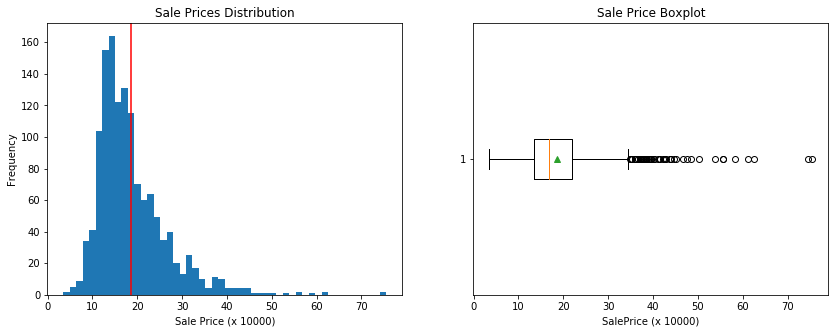

In [17]:
# First let us look at the SalePrice distribution
plt.figure(figsize=(14,5))
plt.subplot(1,2,1); plt.hist(df_feature['SalePrice']/10000,bins=50);
plt.axvline(x=df_feature['SalePrice'].mean()/10000,color='r');
plt.xlabel('Sale Price (x 10000)');plt.ylabel('Frequency')
plt.title('Sale Prices Distribution')

plt.subplot(1,2,2); plt.boxplot(df_feature['SalePrice']/10000,vert=False,showmeans=True)
plt.xlabel('SalePrice (x 10000)')
plt.title('Sale Price Boxplot')

<font size=3> **We can see the dataset of salePrice has a long right tail meaning that the distribution is positivly distributed**

In [18]:
# find out the skewness and kurtosis of the distribution
print("Skewness : %.2f"%df_feature['SalePrice'].skew())
print("Kurtosis : %.2f"%df_feature['SalePrice'].kurt())

Skewness : 1.94
Kurtosis : 6.82


<font color = 'midnightblue'><font size = 4> **2.1 Visualize the datasets and correlation matrix** <a name = "2.1"></a>
    
[Back to TOP](#toc)

<font size=3> **check the correlation matrix to examine which features are most correlatd to SalePrice**

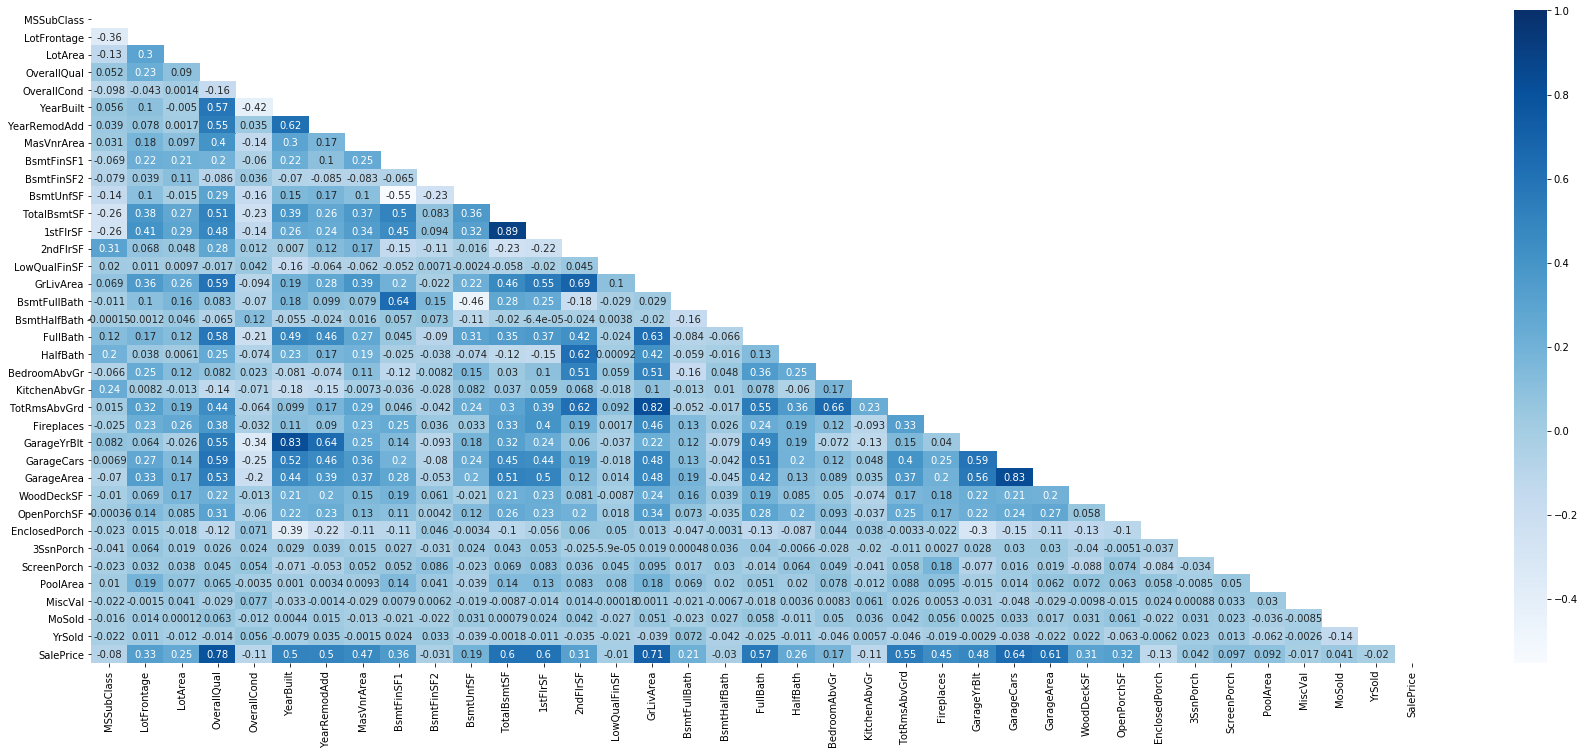

In [19]:
# Let's check te correalation matrix
corr = df_feature.corr(method='pearson')
plt.figure(figsize=(30,12))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,cmap=mpl.cm.Blues,annot=True)

<font size=3> **We can see from the correlation heatmap that SalePrice is most correlated with OverallQual,GrLiveArea. We drop the features which have | $\rho$ | < 0.3**

In [20]:
df_feature_new = df_feature.drop(['MSSubClass', 'LotArea',  'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',  'BsmtFullBath','BsmtHalfBath',  'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],axis=1)
df_feature_new.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,1710,2,8,0,2003.0,2,548,0,61,208500
1,3,1,3,3,0,2,0,24,1,2,...,1262,2,6,1,1976.0,2,460,298,0,181500
2,3,1,0,3,0,4,0,5,2,2,...,1786,2,6,1,2001.0,2,608,0,42,223500
3,3,1,0,3,0,0,0,6,2,2,...,1717,1,7,1,1998.0,3,642,0,35,140000
4,3,1,0,3,0,2,0,15,2,2,...,2198,2,9,1,2000.0,3,836,192,84,250000


<font size=3> Visualize the features against the target Saleprice

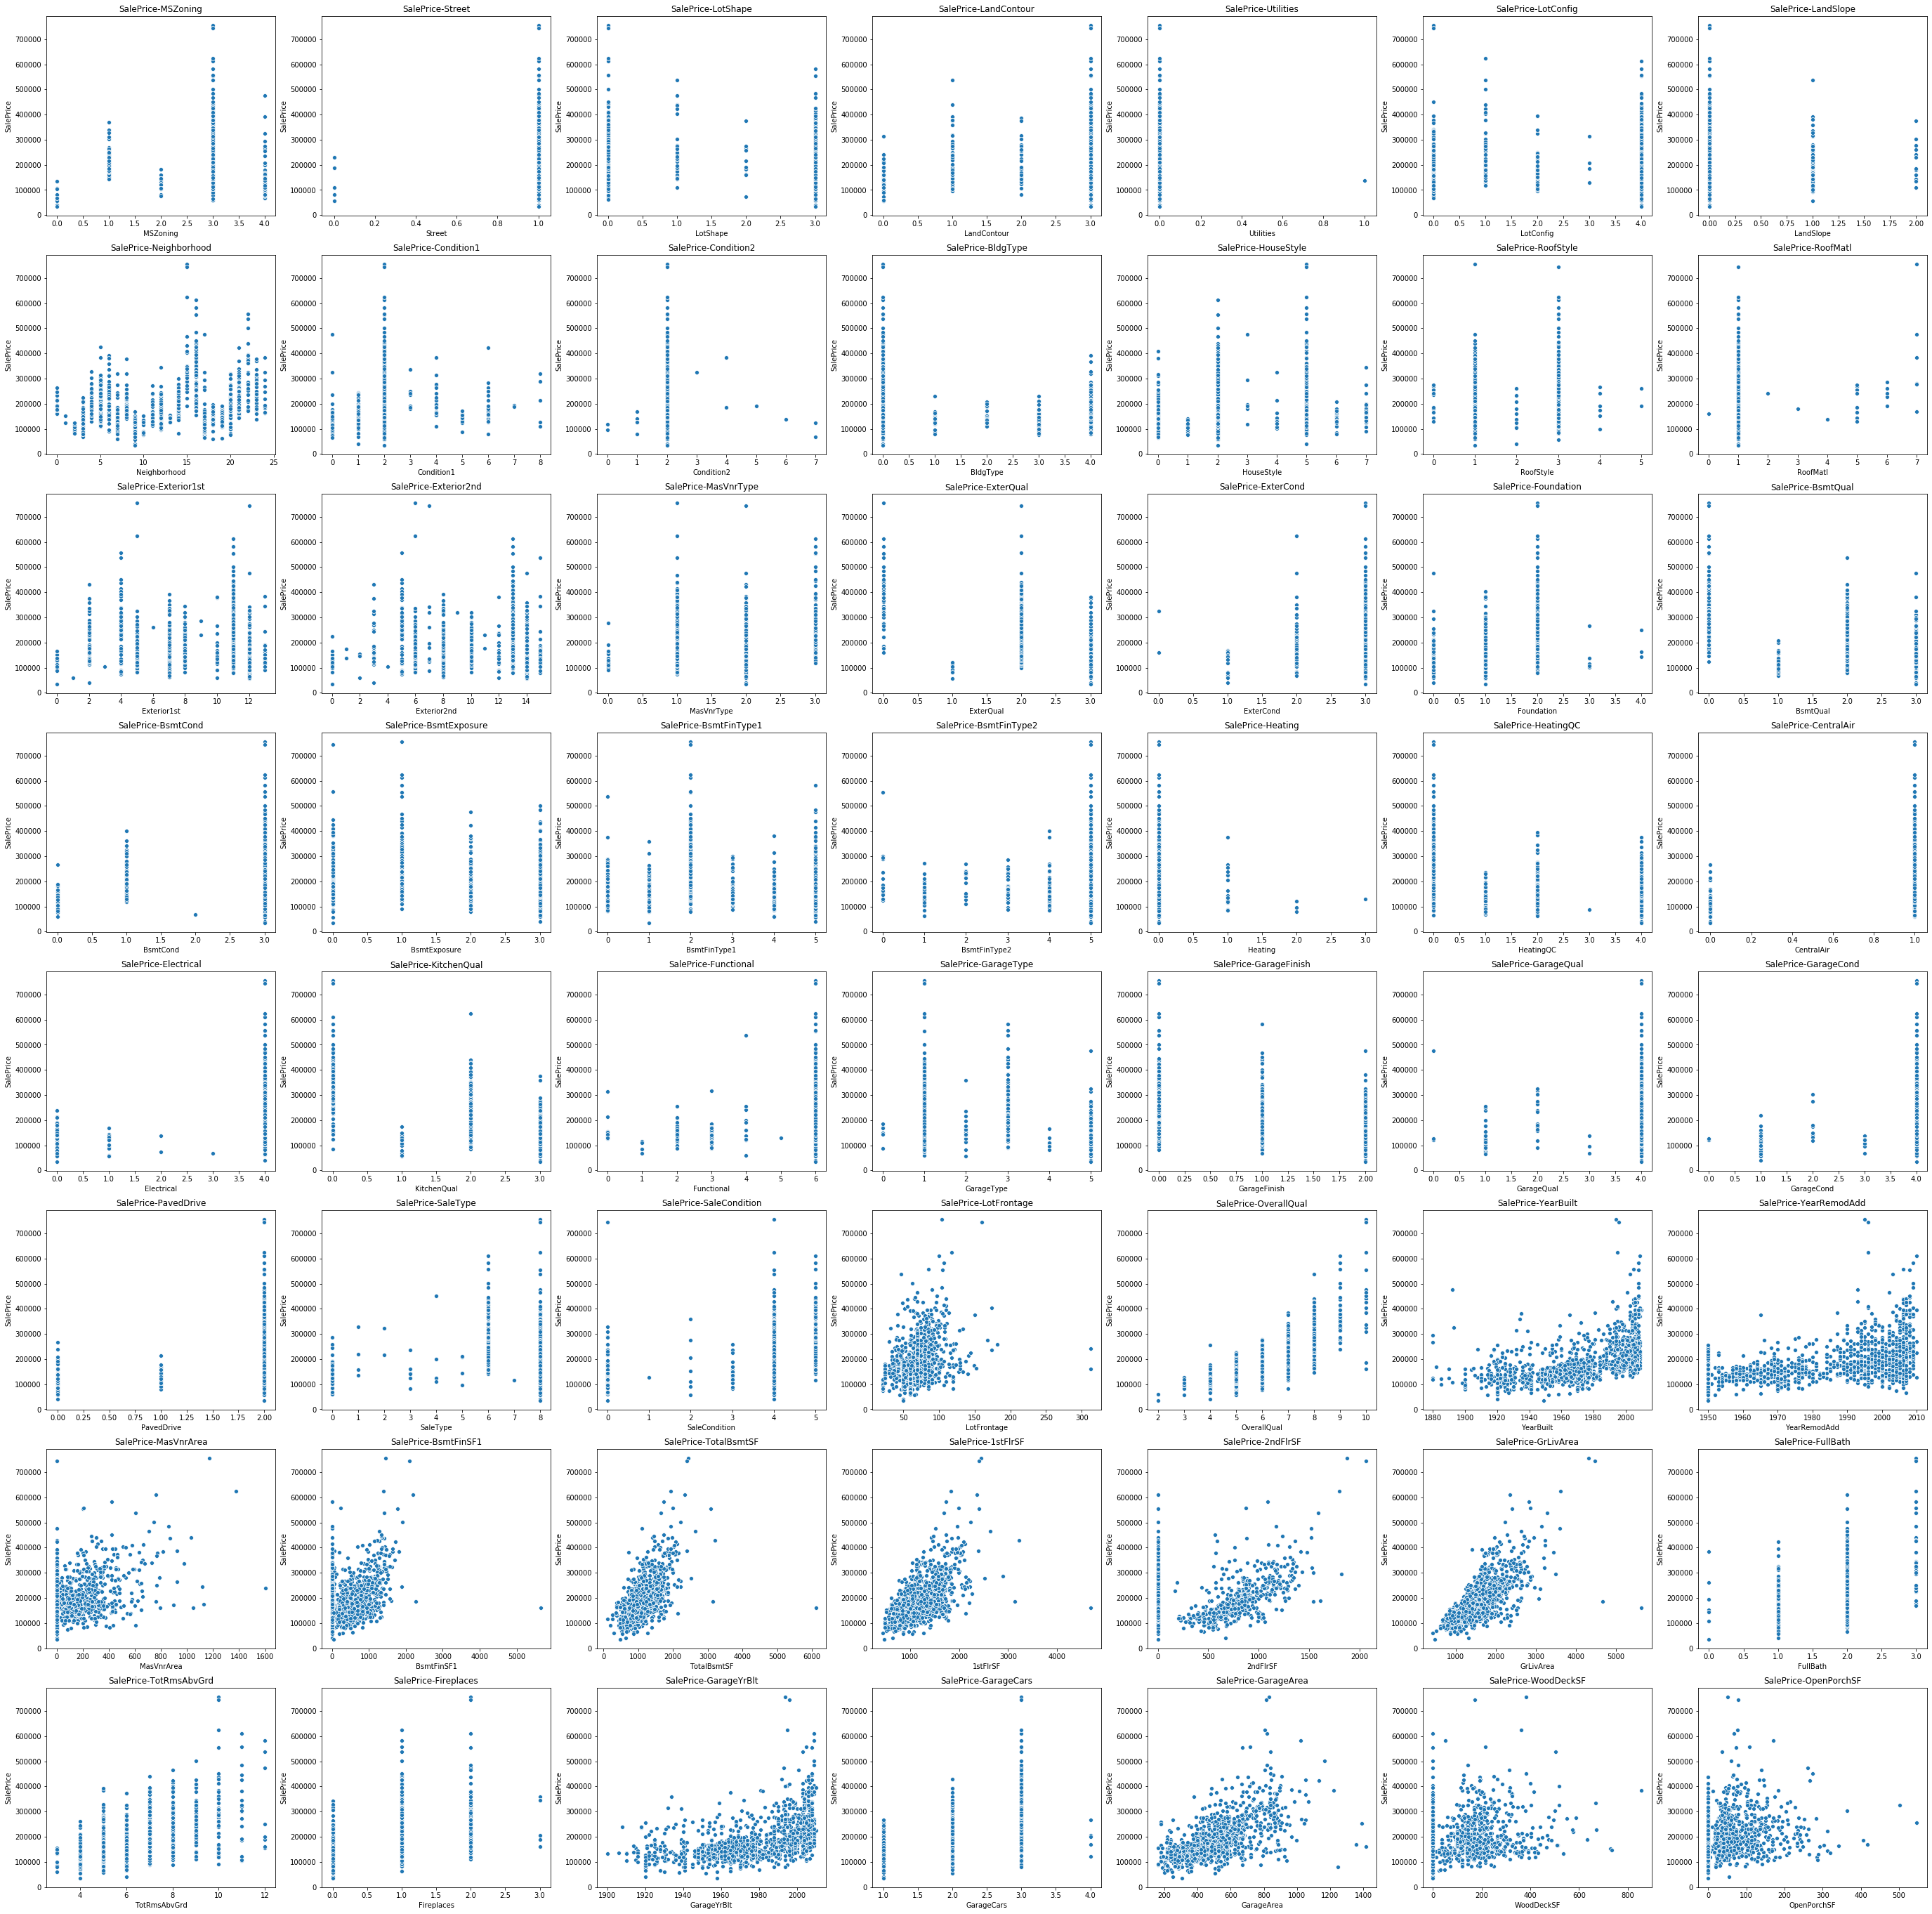

In [21]:
plt_idx = 1
plt.figure(figsize=(48,49))
for i in range(len(df_feature_new.columns)-1):
    col_name = df_feature_new.columns[i]
    feature = df_feature_new[col_name]
    target = df_feature_new['SalePrice']
    plt.subplot(8,7,plt_idx)
    sns.scatterplot(x=feature,y=target,palette=None)
    plt.xlabel(col_name)
    plt.ylabel('SalePrice')
    plt.title('SalePrice' + '-' + str(col_name) )
    plt_idx = plt_idx+1

<font size=3> Looks like many features are not useful to predict, thus we remove these features.

In [22]:
df_feature_new.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition', 'LotFrontage', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [23]:
# Remove seemly usless features

df_feature_new1 = df_feature_new.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],axis=1)

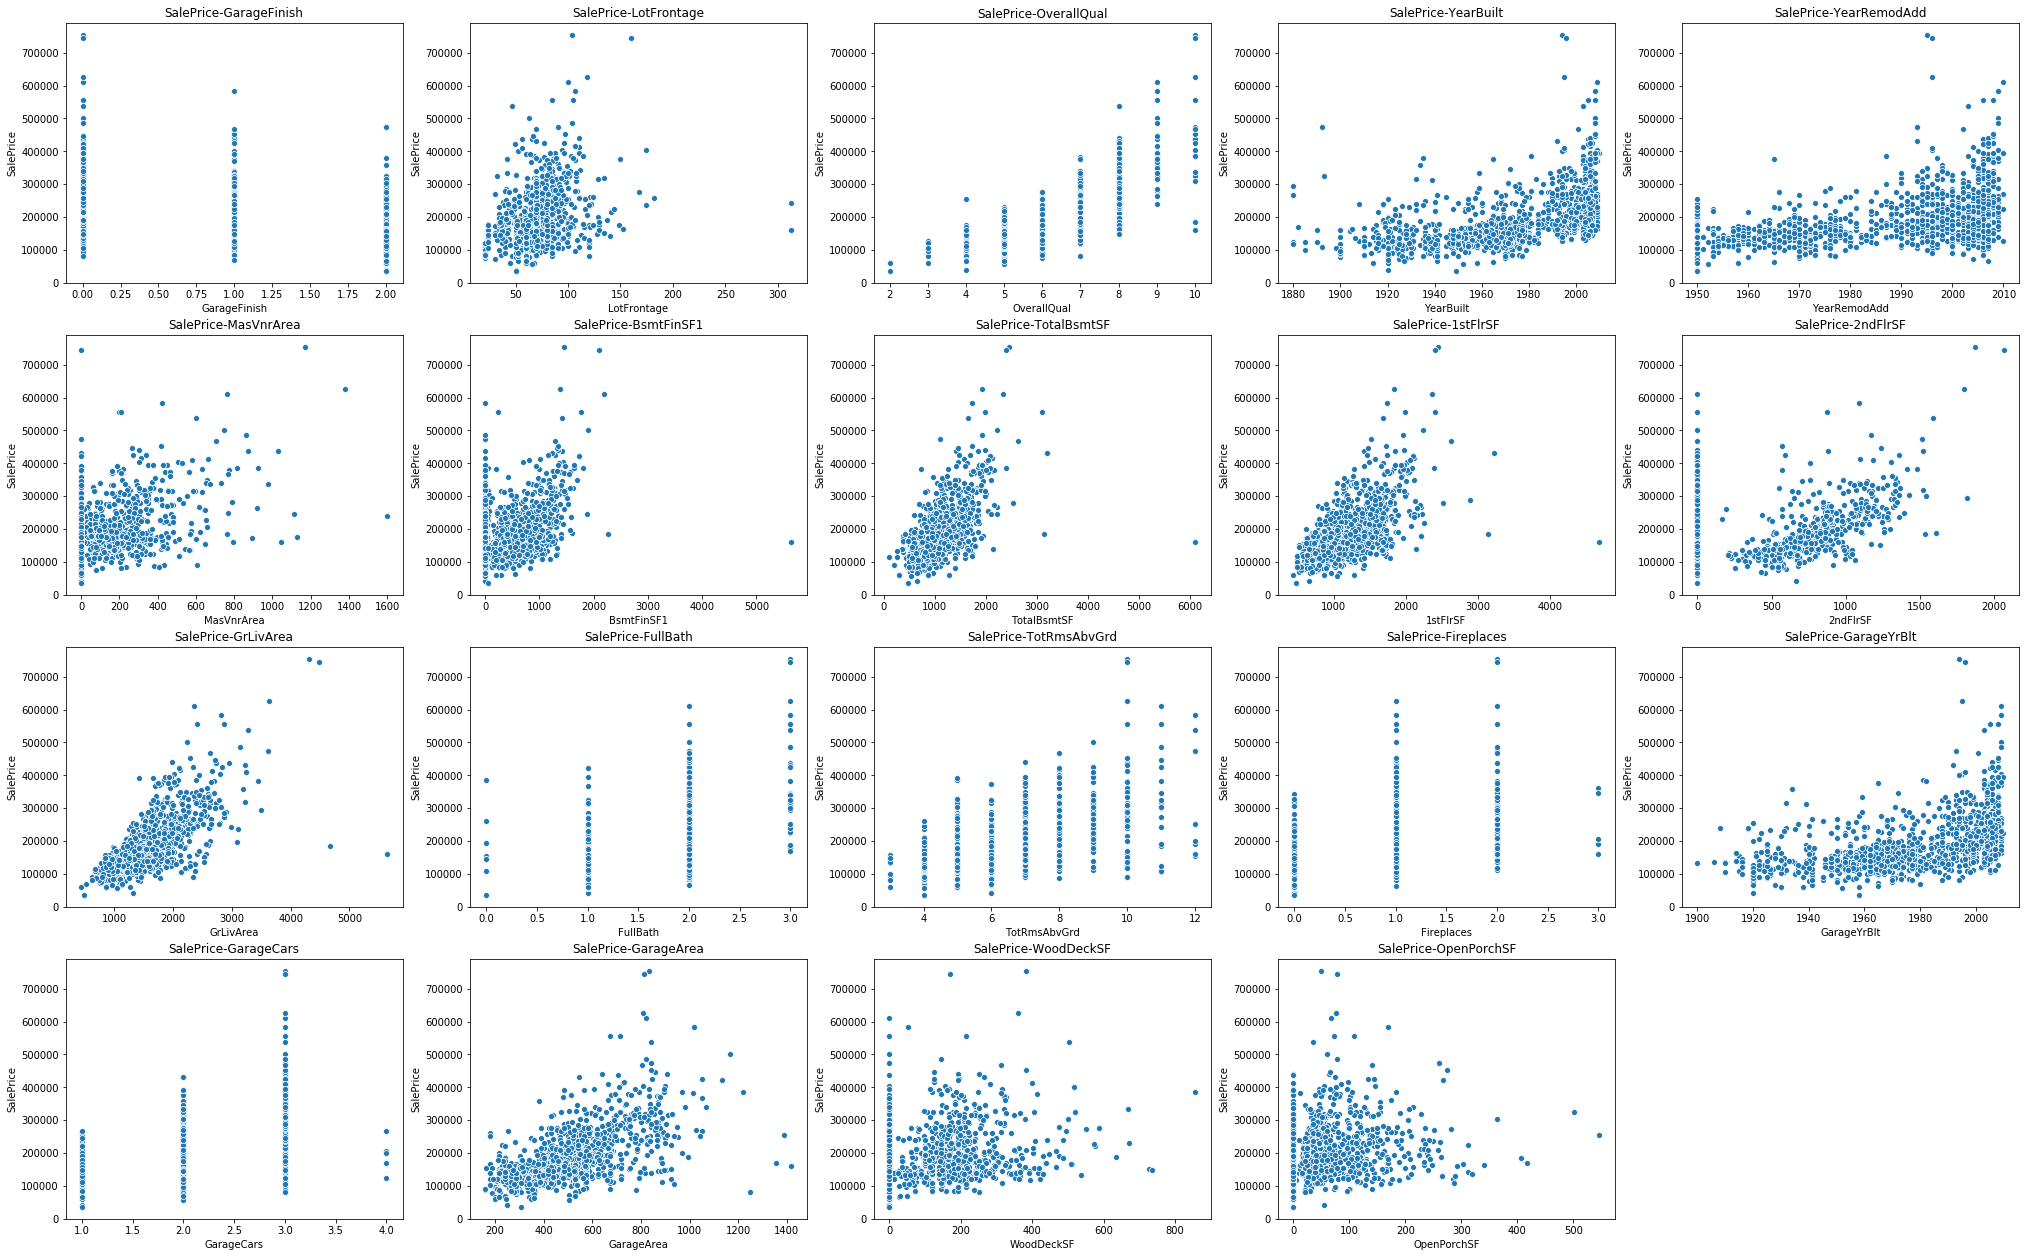

In [24]:
#### Plot the remaining features that seem helpful to predict

plt_idx = 1
plt.figure(figsize=(35,22))
for i in range(len(df_feature_new1.columns)-1):
    col_name = df_feature_new1.columns[i]
    feature = df_feature_new1[col_name]
    target = df_feature_new1['SalePrice']
    plt.subplot(4,5,plt_idx)
    sns.scatterplot(x=feature,y=target,palette=None)
    plt.xlabel(col_name)
    plt.ylabel('SalePrice')
    plt.title('SalePrice' + '-' + str(col_name) )
    plt_idx = plt_idx+1

<font color = 'midnightblue'><font size = 4> **2.2 Standardization** <a name = "2.2"></a>
    
[Back to TOP](#toc)

<font size = 3> There are still many outliers for every features. We first scale the datasets by using StandardScale and then remove some outliers manually

In [25]:
df_feature_std = pd.DataFrame()
for i in range(len(df_feature_new1.columns)):
    scale = StandardScaler().fit_transform(df_feature_new1[[df_feature_new1.columns[i]]])
    scale = pd.DataFrame(scale,columns=[df_feature_new1.columns[i]])
    df_feature_std = pd.concat([df_feature_std, scale],axis=1)

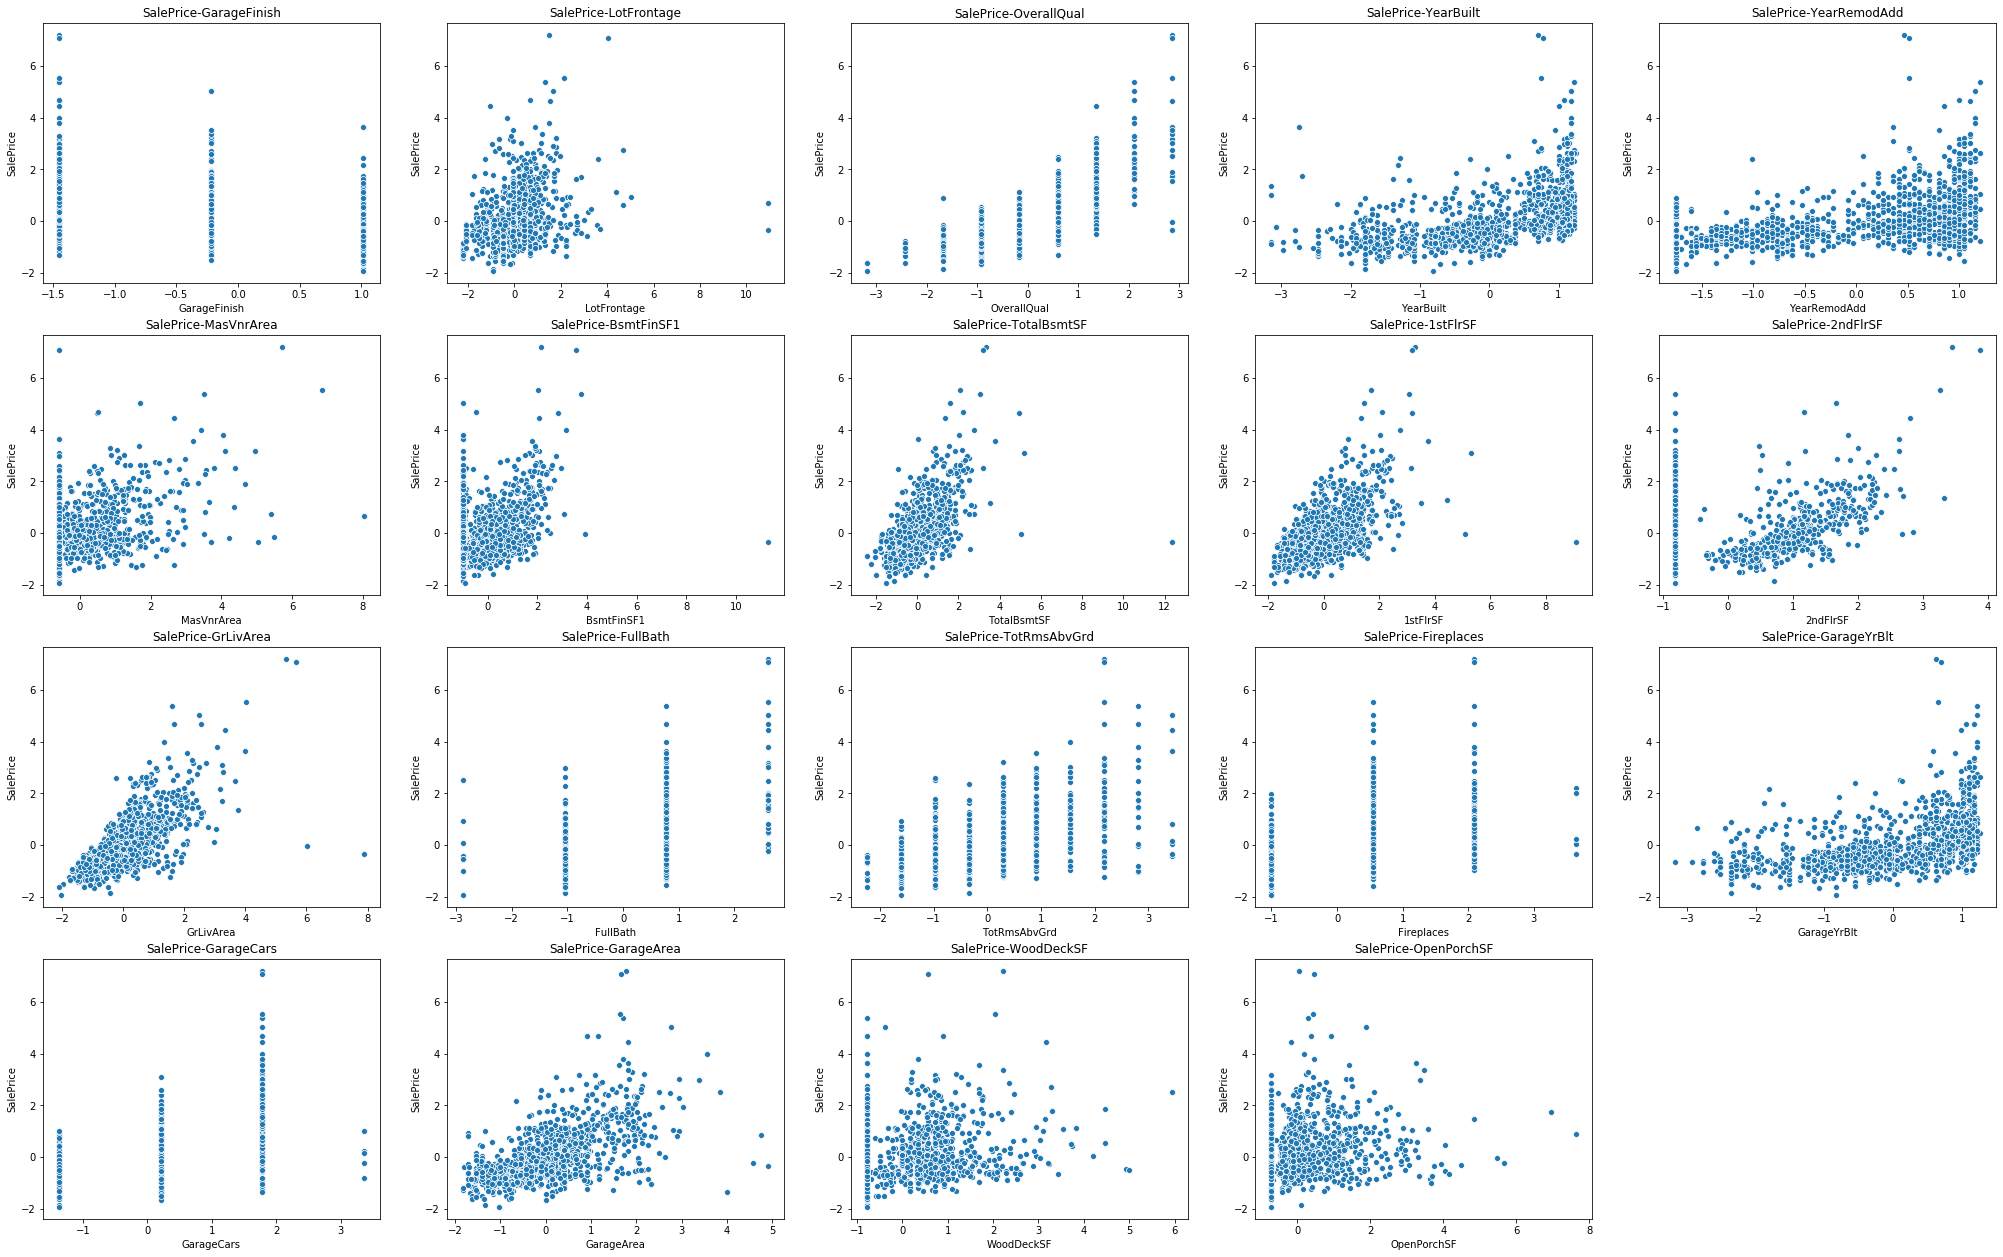

In [26]:
plt_idx = 1
plt.figure(figsize=(35,22))
for i in range(len(df_feature_std.columns)-1):
    col_name = df_feature_std.columns[i]
    feature = df_feature_std[col_name]
    target = df_feature_std['SalePrice']
    plt.subplot(4,5,plt_idx)
    sns.scatterplot(x=feature,y=target,palette=None)
    plt.xlabel(col_name)
    plt.ylabel('SalePrice')
    plt.title('SalePrice' + '-' + str(col_name) )
    plt_idx = plt_idx+1

<font color = 'midnightblue'><font size = 4> **2.3 Remove outliers** <a name = "2.3"></a>
    
[Back to TOP](#toc)

<font size=3> After the standardization, we can see that the range is reduced to [-2,4]. However, for several datasets, we can spot some outliers, therefore we remove the outliers that > 4

In [27]:
tuple_TF = df_feature_std < 4
df_feature_std1 = df_feature_std[tuple_TF]

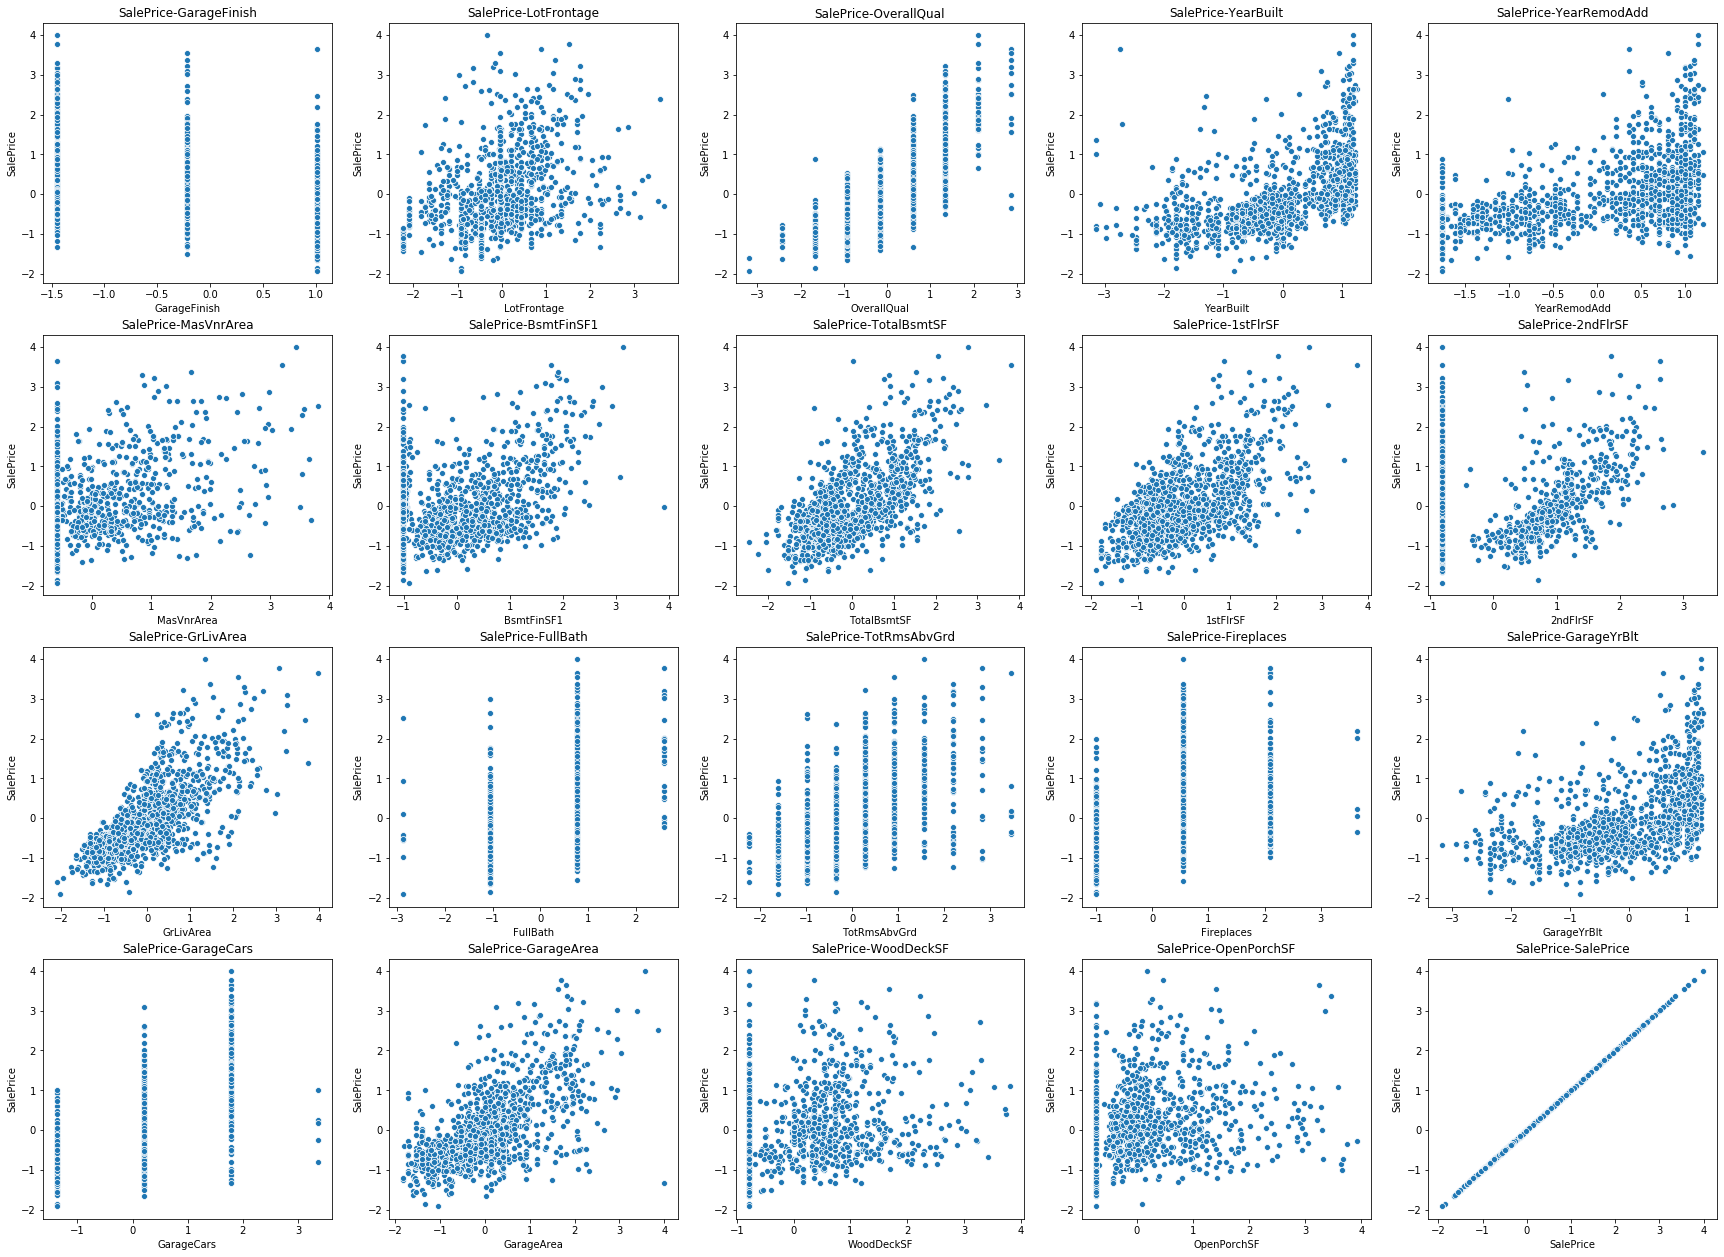

In [28]:
plt_idx = 1
plt.figure(figsize=(30,22))
for i in range(len(df_feature_std1.columns)):
    col_name = df_feature_std1.columns[i]
    feature = df_feature_std1[col_name]
    target = df_feature_std1['SalePrice']
    plt.subplot(4,5,plt_idx)
    sns.scatterplot(x=feature,y=target,palette='YlGnBu')
    plt.xlabel(col_name)
    plt.ylabel('SalePrice')
    plt.title('SalePrice' + '-' + str(col_name) )
    plt_idx = plt_idx+1

<font size = 3> **As we can see, the dataset are much clearer as there are less outliers and all scaled to standard**

In [29]:
df_feature_std1.columns

Index(['GarageFinish', 'LotFrontage', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

In [30]:
df_feature_std1 = df_feature_std1.dropna()
df_dep = df_feature_std1['SalePrice']
df_indep = df_feature_std1.drop(['SalePrice'],axis=1)

In [31]:
print(df_dep.shape)
print(df_indep.shape)

(1294,)
(1294, 19)


---

## **3. Train Test Split** <a name = "3"></a>
[Back to TOP](#toc)

<font size=3> In this section, we will use several linear regression model such as the Normal equation, the Stochastic Gradient Descent and Gradient Boosting Regression to analyse both training and testing dataset that obtained from last section. We will therefore compare the results and talk about some issues of using linear regression model when analysing data.

<font color = 'midnightblue'><font size = 4> **3.1 Linear regression model - Normal Equation** <a name = "3.1"></a>

In [32]:
## Split the datasets to training set and testing set
x_train, x_test,y_train,y_test = train_test_split(df_indep,df_dep,test_size = .33, random_state=999)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(866, 19)
(428, 19)
(866,)
(428,)


In [33]:
## Here I have defined some useful functions which enable me showing the results and chart much clearer
def summary_stats(x,y,yhat,names='LM'):
    """
    Return a dataframe that contains a summary of regression results
    inputs:
    x: feature data
    y: target data
    yhat: predicted y
    names: linear regression name,defaulted as LM
    """
    mse = np.round(np.sqrt(mean_squared_error(y, yhat)),4)
    r2 = np.round(r2_score(y, yhat),4)
    r_squared = r2_score(y, yhat)
    adj_R2 = np.round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),4)
    return pd.DataFrame({
        "Mean Squared Error": mse,
        "R Squared":r2,
        "Adjusted R Squared":adj_R2
    },index=[names])

def plot_learning_curves(model, x_train, x_test,y_train,y_test):
    """
    plot the learning curve to see the errors of traing set and test set
    model: linear regression model
    x: feature dataset
    y: target dataset
    """
    train_errors, test_errors = [], []
    model = model()
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_test_predict = model.predict(x_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        test_errors.append(mean_squared_error(y_test, y_test_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right") 
    plt.xlabel("Training set size")
    plt.ylabel("MSE")
    plt.title('Learning Curves of Training and Testing Set')

def rr(x,y,lrm):
    """
    Compute the regression results (coefficients and intercepts) of regression models
    Inputs------------------------------------------------------
    x: features data
    y: target data
    lrm: linear regression model
    """
    modl = lrm()
    modl.fit(x,y)
    intercept = pd.DataFrame(np.array([modl.intercept_]),index=['lrm'],columns=['intercept'])
    coefs = pd.DataFrame((modl.coef_).reshape(1,len(x.columns)),index=['lrm'],columns=[x.columns])
    result = pd.concat([intercept,coefs],axis=1)
    return result

In [34]:
# Use the traing set to get the regression model
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# check the intercept and coefficients of linear regression
rr(x_train,y_train,lrm=LinearRegression)

,intercept,"(GarageFinish,)","(LotFrontage,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(BsmtFinSF1,)","(TotalBsmtSF,)","(1stFlrSF,)","(2ndFlrSF,)","(GrLivArea,)","(FullBath,)","(TotRmsAbvGrd,)","(Fireplaces,)","(GarageYrBlt,)","(GarageCars,)","(GarageArea,)","(WoodDeckSF,)","(OpenPorchSF,)"
lrm,-0.009057,-0.030845,0.048925,0.301095,0.072182,0.108085,0.024383,0.141869,0.159086,0.150608,0.210535,0.083339,-0.072231,-0.004926,0.048981,-0.033784,0.01484,0.094248,0.041653,0.039529


In [36]:
# Compute the prediction value using test set
y_pred_test = lm.predict(x_test)

<font size = 3> **See how well the prediction does on training set and testing set**

In [37]:
y_pred_tra = lm.predict(x_train)
pd.concat([summary_stats(x_train,y_train,y_pred_tra,names='LM-Training'),summary_stats(x_test,y_test,y_pred_test,names='LM-Testing')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
LM-Training,0.3347,0.8557,0.8525
LM-Testing,0.3295,0.8561,0.8494


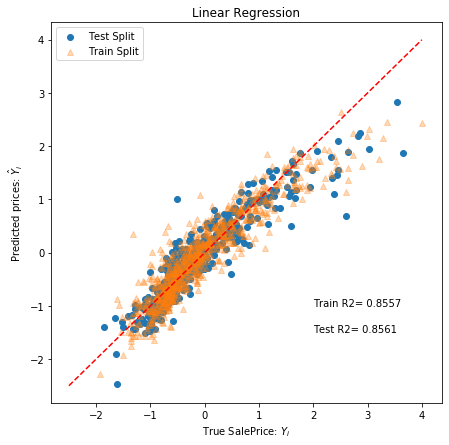

In [38]:
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred_test,marker = 'o',label="Test Split")
ax.scatter(y_train, y_pred_tra,alpha=0.3,marker = '^',label="Train Split")
plt.plot([-2.5,4],[-2.5,4],'--r')
plt.xlabel("True SalePrice: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Linear Regression')
plt.text(2,-1.5,"Test R2= " + str(np.round(r2_score(y_test,y_pred_test),4)))
plt.text(2,-1,"Train R2= " + str(np.round(r2_score(y_train,y_pred_tra),4)))
ax.legend()
plt.show()

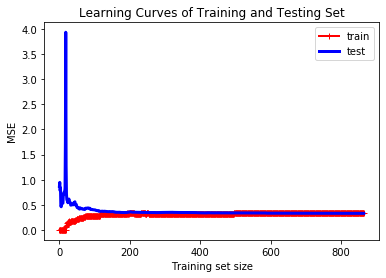

In [39]:
plot_learning_curves(LinearRegression,x_train,x_test,y_train,y_test)

<font size = 3>Comparing the results of the linear regression model's performance on both training set and testing set, we can observe the learning curve of the testing set is quite high in the begining, this is because that the traing model only trained few instances and it is not possible for the testing split to generalize, which caused great error. As the traing set size increases, the error reduces to a plateau.

<font size = 3> Use statsmodel to get the P-values of each feature

In [40]:
mod = sm.OLS(df_dep,df_indep).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              405.0
Date:                Mon, 18 Oct 2021   Prob (F-statistic):                        0.00
Time:                        09:57:49   Log-Likelihood:                         -407.50
No. Observations:                1294   AIC:                                      853.0
Df Residuals:                    1275   BIC:                                      951.2
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

---

<font size=3> According to the Regression summary, the features that are most important are: LotFrontage, OverallQual, YearBuilt, YearRemodAdd, BsmtFinSF1, TotalBsmSF, GrLIvArea, FullBath, Fireplaces, GarageArea, WoodDeckSF and OpenPorchSF.

<font size=3>Let us drop the unimportant features from the original datasets and repeat the linear regression on both traing and testing sets and check the results

In [41]:
df_important = df_feature_std1.drop(['GarageFinish', 'MasVnrArea', '1stFlrSF','2ndFlrSF', 'TotRmsAbvGrd','GarageYrBlt', 'GarageCars','SalePrice'],axis=1)

In [42]:
x_train2, x_test2,y_train2,y_test2 = train_test_split(df_important,df_dep,test_size = .33, random_state=999)

<font size=3> **Check how well the model does on testing set and training set**

In [43]:
lm.fit(x_train2,y_train2)
y_pred2 = lm.predict(x_test2)
y_pred_tra2 = lm.predict(x_train2)
pd.concat([summary_stats(x_test2, y_test2, y_pred2,names='LM-Testing'),summary_stats(x_train2, y_train2, y_pred_tra2,names='LM-Traininging')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
LM-Testing,0.3284,0.8571,0.8529
LM-Traininging,0.3372,0.8536,0.8515


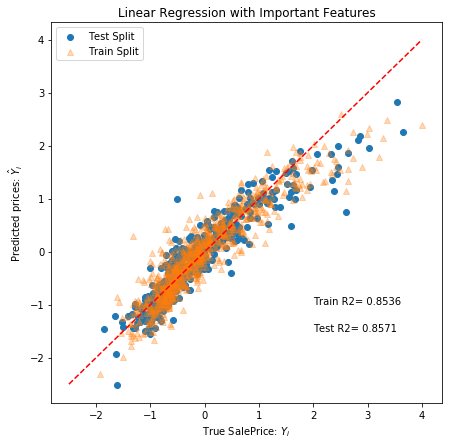

In [44]:
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(y_test2, y_pred2,marker = 'o',label="Test Split")
ax.scatter(y_train2, y_pred_tra2,alpha=0.3,marker = '^',label="Train Split")
plt.plot([-2.5,4],[-2.5,4],'--r')
plt.xlabel("True SalePrice: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Linear Regression with Important Features')
plt.text(2,-1.5,"Test R2= " + str(np.round(r2_score(y_test2,y_pred2),4)))
plt.text(2,-1,"Train R2= " + str(np.round(r2_score(y_train2,y_pred_tra2),4)))
ax.legend()
plt.show()

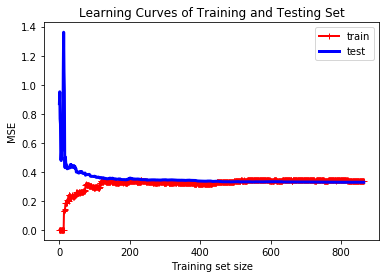

In [45]:
plot_learning_curves(LinearRegression,x_train2,x_test2,y_train2,y_test2)

<font color = "blue"><font size = 3> **After removed the features that are not important, the $\tilde R^2$ of the testing split has increased to 0.8529 from previous 0.8494. With remaining only 11 features, our model is more accurate and the explanatory power of the model is higher.**

<font color = 'midnightblue'><font size = 4> **3.2 Stochastic Gradient Descent Regression** <a name ="3.2"></a>

[Back to TOP](#toc)

In [46]:
from sklearn.linear_model import SGDRegressor

In [47]:
# Call the model
sgd = SGDRegressor(max_iter=10000,warm_start=False,penalty=None,learning_rate='constant',eta0=0.0005,tol=None)

In [48]:
# Fit the model with trainng set
sgd.fit(x_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=None, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [49]:
# Print the results: coefficients and intercept of the regression model
rr(x_train,y_train,SGDRegressor)

,intercept,"(GarageFinish,)","(LotFrontage,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(BsmtFinSF1,)","(TotalBsmtSF,)","(1stFlrSF,)","(2ndFlrSF,)","(GrLivArea,)","(FullBath,)","(TotRmsAbvGrd,)","(Fireplaces,)","(GarageYrBlt,)","(GarageCars,)","(GarageArea,)","(WoodDeckSF,)","(OpenPorchSF,)"
lrm,-0.005342,-0.03748,0.050011,0.303927,0.061178,0.112901,0.032979,0.152429,0.150111,0.095336,0.122791,0.167801,-0.063584,0.011561,0.057127,-0.015983,0.029896,0.089489,0.04411,0.044292


In [50]:
# How well did it do on the testing set and training set
y_pred_sgd1 = sgd.predict(x_test)
y_pred_sgd2 = sgd.predict(x_train)
pd.concat([summary_stats(x_test, y_test, y_pred_sgd1,names='SGD-Testing'),summary_stats(x_train, y_train, y_pred_sgd2,names='SGD-Training')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
SGD-Testing,0.3293,0.8563,0.8496
SGD-Training,0.3352,0.8553,0.8521


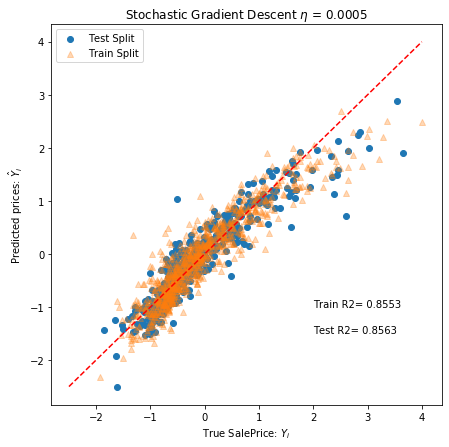

In [51]:
# Plot the graph
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred_sgd1,marker = 'o',label="Test Split")
ax.scatter(y_train, y_pred_sgd2,alpha=0.3,marker = '^',label="Train Split")
plt.plot([-2.5,4],[-2.5,4],'--r')
plt.xlabel("True SalePrice: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Stochastic Gradient Descent $\eta$ = 0.0005')
plt.text(2,-1.5,"Test R2= " + str(np.round(r2_score(y_test,y_pred_sgd1),4)))
plt.text(2,-1,"Train R2= " + str(np.round(r2_score(y_train,y_pred_sgd2),4)))
ax.legend()
plt.show()

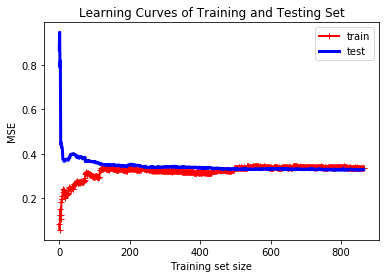

In [52]:
plot_learning_curves(SGDRegressor,x_train,x_test,y_train,y_test)

<font color = 'midnightblue'><font size = 4> **3.3 Gradient Boosting Regression** <a name = "3.3"></a>

[Back to TOP](#toc)

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

In [54]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_pred_gbr = GBR.predict(x_test) #presdiction using testing set
y_pred_gbr2 = GBR.predict(x_train) #prediction using traing set
pd.concat([summary_stats(x_test, y_test, y_pred_gbr,names='GBR-Testing'),summary_stats(x_train, y_train, y_pred_gbr2,names='GBR-Training')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
GBR-Testing,0.3207,0.8637,0.8573
GBR-Training,0.1868,0.9551,0.9540


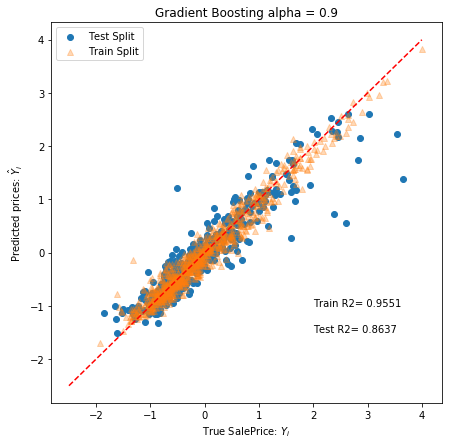

In [56]:
# Plot the graph
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred_gbr,marker = 'o',label="Test Split")
ax.scatter(y_train, y_pred_gbr2,alpha=0.3,marker = '^',label="Train Split")
plt.plot([-2.5,4],[-2.5,4],'--r')
plt.xlabel("True SalePrice: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Gradient Boosting alpha = 0.9')
plt.text(2,-1.5,"Test R2= " + str(np.round(r2_score(y_test,y_pred_gbr),4)))
plt.text(2,-1,"Train R2= " + str(np.round(r2_score(y_train,y_pred_gbr2),4)))
ax.legend()
plt.show()

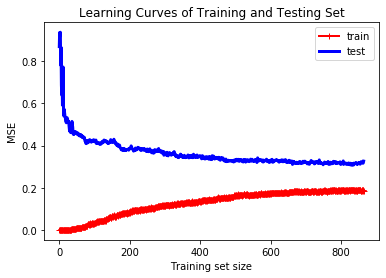

In [57]:
plot_learning_curves(GradientBoostingRegressor,x_train,x_test,y_train,y_test)

<font size =3> From the chart above, we can spot some differences compared with previous ones: the learning curve of training set is lower in terms of the MSE and there is a gap between testing and training curves. With more data added, the testing curve would converge to the training curve. Besides, as we can see that the training split's error is very limited and has a $R^2$ = 0.955 meaning that the model performs much better on the training data than on the testing data which might indicate the model is overfitting.

---

## 4. **Ridge and LASSO Regrassion** <a name = "4"></a>
[Back to TOP](#toc)

<font color = 'midnightblue'><font size = 4> **4.1 Ridge Regression** <a name = "4.1"></a>

In [58]:
ridgereg = Ridge(alpha=0.1,normalize=True).fit(x_train,y_train)

In [59]:
rr(x_train,y_train,Ridge)

,intercept,"(GarageFinish,)","(LotFrontage,)","(OverallQual,)","(YearBuilt,)","(YearRemodAdd,)","(MasVnrArea,)","(BsmtFinSF1,)","(TotalBsmtSF,)","(1stFlrSF,)","(2ndFlrSF,)","(GrLivArea,)","(FullBath,)","(TotRmsAbvGrd,)","(Fireplaces,)","(GarageYrBlt,)","(GarageCars,)","(GarageArea,)","(WoodDeckSF,)","(OpenPorchSF,)"
lrm,-0.009011,-0.030847,0.049061,0.300392,0.072385,0.108155,0.024702,0.141846,0.15921,0.125307,0.181822,0.11638,-0.071796,-0.004591,0.049177,-0.03366,0.015295,0.093887,0.04155,0.03959


In [60]:
y_pred_ridge = ridgereg.predict(x_test)

In [61]:
# Plot different alpha
def plot_ridge(alpha,plotarea,plotFlag=False):
    ridgereg = Ridge(alpha=alpha,normalize=True).fit(x_train,y_train)
    y_pred = ridgereg.predict(x_test)
    rss = np.round(sum((y_pred-y_test)**2),3)
    if plotFlag == True:
        plt.subplot(plotarea)
        plt.tight_layout()
        plt.scatter(y_test,y_pred)
        plt.xlabel("True SalePrice: $Y_i$")
        plt.ylabel("Predicted prices: $\hat{Y}_i$")
        plt.text(-2, 2.5, r'RSS='+ str(rss))
        plt.title("Ridge Regression: alpha = " + str(alpha))
        plt.plot([-2.5,4],[-2.5,4],'--r')
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

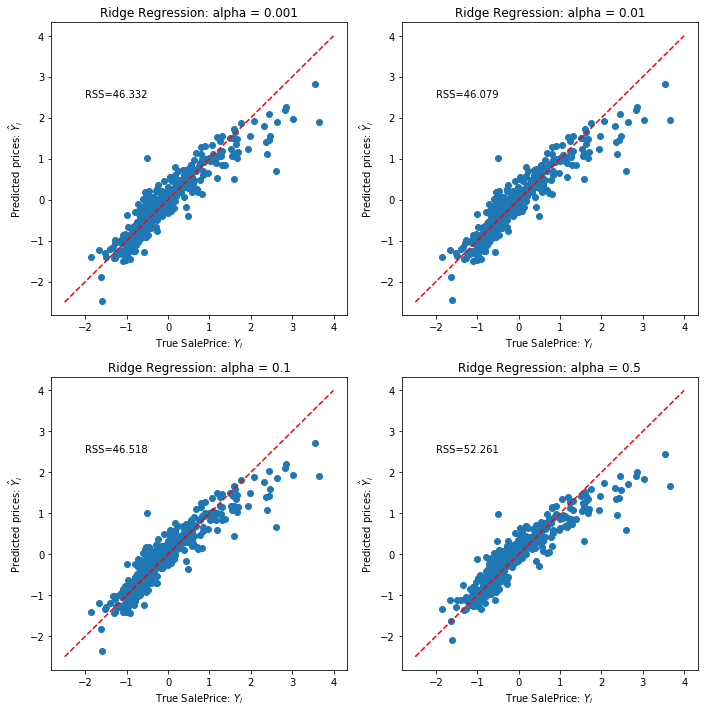

In [62]:
plt.figure(figsize=(10,10))
plot_ridge(0.001,"221",plotFlag=True)
plot_ridge(0.01, "222",plotFlag=True)
plot_ridge(0.1,"223",plotFlag=True)
plot_ridge(0.5,"224",plotFlag=True)

In [63]:
# See how well the prediction does on training set
y_pred_rdgtra = ridgereg.predict(x_train)
pd.concat([summary_stats(x_train, y_train, y_pred_rdgtra,names='Ridge-Training'),summary_stats(x_test, y_test, y_pred_ridge,names='Ridge-Testing')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
Ridge-Training,0.3379,0.853,0.8497
Ridge-Testing,0.3297,0.856,0.8492


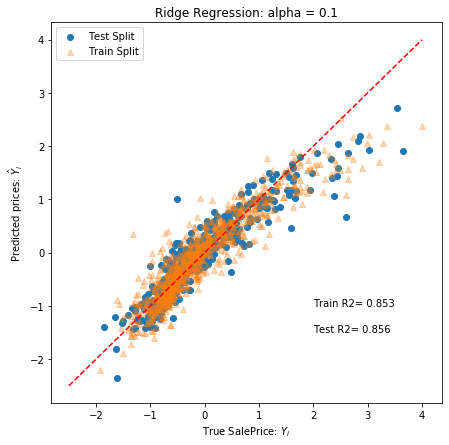

In [64]:
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred_ridge,marker = 'o',label="Test Split")
ax.scatter(y_train, y_pred_rdgtra,alpha=0.3,marker = '^',label="Train Split")
plt.xlabel("True SalePrice: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Ridge Regression: alpha = 0.1')
plt.text(2,-1.5,"Test R2= " + str(np.round(r2_score(y_test,y_pred_ridge),3)))
plt.text(2,-1,"Train R2= " + str(np.round(r2_score(y_train,y_pred_rdgtra),3)))
plt.plot([-2.5,4],[-2.5,4],'--r')
ax.legend()
plt.show()

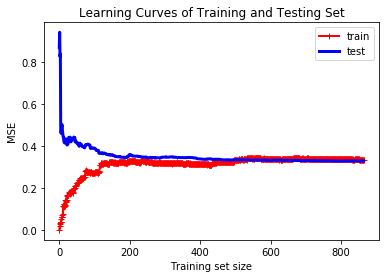

In [65]:
plot_learning_curves(Ridge,x_train,x_test,y_train,y_test)

<font color = 'midnightblue'><font size=4> **4.2 LASSO Regression**<a name ="4.2"></a>
    
[Back to TOP](#toc)

In [66]:
lassoreg = Lasso(alpha=0.0001,normalize=True).fit(x_train,y_train)
y_pred_lasso = lassoreg.predict(x_test) # use test data to predict 

In [67]:
lassoreg.coef_

array([-0.02847017,  0.04929066,  0.30088781,  0.056012  ,  0.10419968,
        0.02541062,  0.1436296 ,  0.15398638,  0.        ,  0.03090275,
        0.28115208, -0.06003946,  0.        ,  0.0501925 , -0.01126141,
        0.01223194,  0.08905   ,  0.03847326,  0.03839774])

In [68]:
# Plot different alpha
def plot_lasso(alpha,plotarea,plotFlag=False):
    lassoreg = Lasso(alpha=alpha,normalize=True).fit(x_train,y_train)
    y_pred = lassoreg.predict(x_test)
    rss = np.round(sum((y_pred-y_test)**2),3)
    if plotFlag == True:
        plt.subplot(plotarea)
        plt.tight_layout()
        plt.scatter(y_test,y_pred)
        plt.xlabel("True SalePrice: $Y_i$")
        plt.ylabel("Predicted prices: $\hat{Y}_i$")
        plt.text(-2, 2.5, r'RSS='+ str(rss))
        plt.title('lasso alpha =' + str(alpha))
        plt.plot([-2.5,4],[-2.5,4],'--r')
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

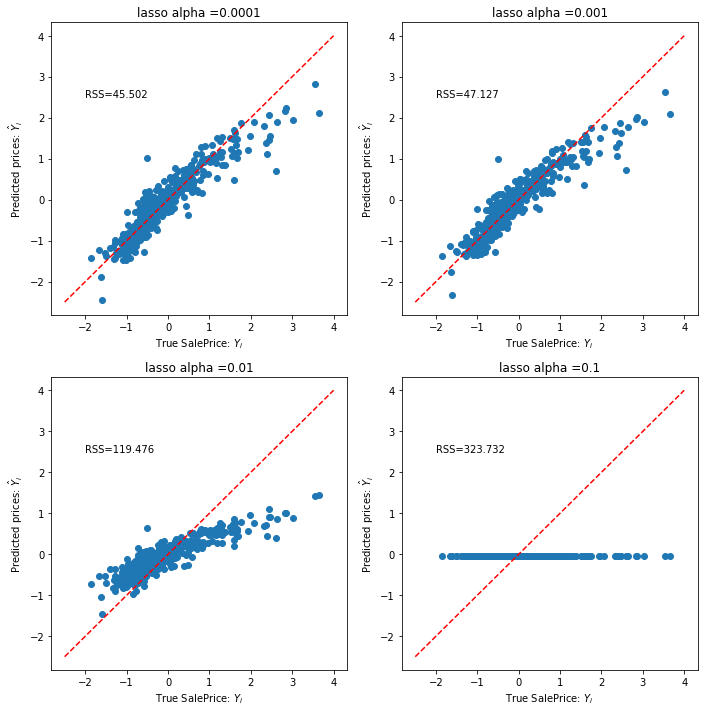

In [69]:
plt.figure(figsize=(10,10))
plot_lasso(0.0001,"221",plotFlag=True)
plot_lasso(0.001, "222",plotFlag=True)
plot_lasso(0.01,"223",plotFlag=True)
plot_lasso(0.1,"224",plotFlag=True)



<font size = 3>Lasso is anoter regularized linear regression model, it tends to completely eliminate the weights of the least important features. As we can see from the chart above, when the alpha is set to a relatively higher value, all the features coefficients become 0 and the regression line becomes a horizontal line where $y = intercept$
    


In [70]:
# See how well the prediction does on training set
y_pred_lassotra = lassoreg.predict(x_train)
pd.concat([summary_stats(x_train, y_train, y_pred_lassotra,names='LASSO-Training'),summary_stats(x_test, y_test, y_pred_lasso,names='LASSO-Testing')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
LASSO-Training,0.3354,0.8551,0.8519
LASSO-Testing,0.3261,0.8591,0.8525


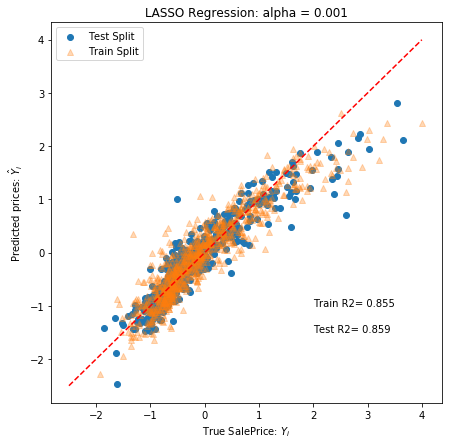

In [71]:
fig,ax=plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred_lasso,marker = 'o',label="Test Split")
ax.scatter(y_train, y_pred_lassotra,alpha=0.3,marker = '^',label="Train Split")
plt.xlabel("True SalePrice: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('LASSO Regression: alpha = 0.001')
plt.text(2,-1.5,"Test R2= " + str(np.round(r2_score(y_test,y_pred_lasso),3)))
plt.text(2,-1,"Train R2= " + str(np.round(r2_score(y_train,y_pred_lassotra),3)))
plt.plot([-2.5,4],[-2.5,4],'--r')
ax.legend()
plt.show()

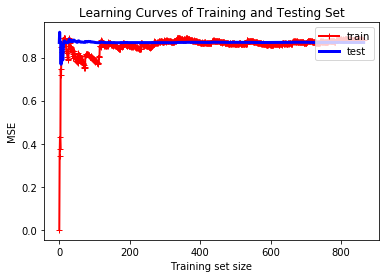

In [72]:
plot_learning_curves(Lasso,x_train,x_test,y_train,y_test)

<font size = 3>The learning curves of both dataset have bigger errors compared to other ones, this is mainly because the Lasso regression mdel defaultly sets alpha to 1 whihc is too great and would immediately eliminate all the features by setting their coefficients to 0

## 5.Conclusion <a name = "5"></a>
[Back to TOP](#toc)

<font size = 3> **Summary result of using Linear regression model on different datasets**

In [73]:
pd.concat([summary_stats(x_test2, y_test2, y_pred2,names='LM-Testing(dropped least important features)'),summary_stats(x_test,y_test,y_pred_test,names='LM-Testing')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
LM-Testing(dropped least important features),0.3284,0.8571,0.8529
LM-Testing,0.3295,0.8561,0.8494


<font size = 3> **Summary result of training sets performance using different models**

In [74]:
pd.concat([summary_stats(x_train,y_train,y_pred_tra,names='LM-Training'),summary_stats(x_train, y_train, y_pred_sgd2,names='SGD-Training'),summary_stats(x_train, y_train, y_pred_gbr2,names='GBR-Training'),summary_stats(x_train, y_train, y_pred_rdgtra,names='Ridge-Training'),summary_stats(x_train, y_train, y_pred_lassotra,names='LASSO-Training')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
LM-Training,0.3347,0.8557,0.8525
SGD-Training,0.3352,0.8553,0.8521
GBR-Training,0.1868,0.9551,0.9540
Ridge-Training,0.3379,0.8530,0.8497
LASSO-Training,0.3354,0.8551,0.8519


<font size = 3> **Summary result of testing sets performance using different models**

In [75]:
pd.concat([summary_stats(x_test,y_test,y_pred_test,names='LM-Testing'),summary_stats(x_test, y_test, y_pred_sgd1,names='SGD-Testing'),summary_stats(x_test, y_test, y_pred_gbr,names='GBR-Testing'),summary_stats(x_test, y_test, y_pred_ridge,names='Ridge-Testing'),summary_stats(x_test, y_test, y_pred_lasso,names='LASSO-Testing')],axis=0)

,Mean Squared Error,R Squared,Adjusted R Squared
LM-Testing,0.3295,0.8561,0.8494
SGD-Testing,0.3293,0.8563,0.8496
GBR-Testing,0.3207,0.8637,0.8573
Ridge-Testing,0.3297,0.8560,0.8492
LASSO-Testing,0.3261,0.8591,0.8525



<font size = 3> First of all, when we are using linear regression models, we are aware of that the linear regresssion has some important assumptions such as : 1) Linearity, 2) Conditional Homoskedasticity, 3) Normality and 0 correlation in error term. In additon, we have to ensure that the multicollinearity doesn't exist for MLR model. However, from the previous scatter plots and the correlation matrix, we can see that the heteroskedasticity exits in many features' data and some of them have high correlation with other ones. This will result in the testing inefficiency and inaccuracy of our model. Thus, we drop the features that are not important and have highly correlation with others (for instance the TotBsmtSF and 1stFlrSF have a correlation of 0.89 and we dropped 1stFlrSF in the second attempt), we found that the linear regression model performs better than before with a higher $\tilde R^2$ = 0.8529 instead of 0.8494.  
    
<font size = 3> From the summary results above, one can find that the Gradient Boosting Regression Model shows the best performance in terms of the MSE and R squared, however there may exist overfitting problem in this model as we have discussed before. The LASSO Model also performs well and when it has an $\alpha$ equal to 0.0001, the model sets some regressors such as (1stFlrSF and TotRmsAbvGrd) to 0 as they are least important and highly correlated to other features, while the explanatory power of the model is still very high ($R^2$ = 0.859 and $\tilde R{^2}$ = 0.8525 for testing split). The regularized models such as Lasso will automatically ignore the useless factors by setting their coeffcients to 0.